In [1]:
import os
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import pickle
from tqdm import tqdm


file_folder = 'train_data_final'

def read(file):
    (rate,sig) = wav.read(file)
    mfcc_feat = mfcc(sig,rate)
    return(mfcc_feat)

labels = ['a','d','su','sa','n','h']

def get_category(f):
    if f[0] == 's' and f[0:2] != 'su' and f[0:2] != 'sa':
        return(0)
        
    elif f[0]== 'a':
        return(1)
        
    elif f[0] == 'd':
        return(2)
        
    elif f[0] == 'n':
        return(3)
        
    elif f[0] == 'h':
        return(4)
    
    elif f[0] == 'f':
        return(7)
        
    elif f[0:2] == 'su':
        return(5)
        
    elif f[0:2] == 'sa':
        return(6)

files = os.listdir(file_folder)

data = []

for i in tqdm(files):
    
    path = file_folder+'/'+i
    #print(i,path)
    d = read(path)
    l = get_category(i)
    for j in d:
        data.append([j,l])
    #break

def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

save_obj(data,file_folder)


 13%|██████████▌                                                                      | 55/424 [00:01<00:10, 34.00it/s]WARNING:root:frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.


 26%|████████████████████▊                                                           | 110/424 [00:03<00:08, 35.23it/s]WARNING:root:frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.


 40%|████████████████████████████████                                                | 170/424 [00:04<00:05, 43.48it/s]WARNING:root:frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.


 54%|███████████████████████████████████████████▌                                    | 231/424 [00:06<00:04, 41.49it/s]WARNING:root:frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.


 69%|███████████████████████████████████████████████████████▍                        | 294/424 [00:07<00:02, 45.41it/s]WARNING:root:frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.


 83%|██████████████████████████████████████████████████████████████████▊             | 354/424 [00:08<00:01, 42.29it/s]WARNING:root:frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 412/424 [00:10<00:00, 42.37it/s]WARNING:root:frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.


100%|████████████████████████████████████████████████████████████████████████████████| 424/424 [00:10<00:00, 39.39it/s]


In [2]:
import os
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import pickle
from tqdm import tqdm


file_folder = 'test_data_final'

def read(file):
    (rate,sig) = wav.read(file)
    mfcc_feat = mfcc(sig,rate)
    return(mfcc_feat)

labels = ['a','d','su','sa','n','h']

def get_category(f):
    if f[0] == 's' and f[0:2] != 'su' and f[0:2] != 'sa':
        return(0)
        
    elif f[0]== 'a':
        return(1)
        
    elif f[0] == 'd':
        return(2)
        
    elif f[0] == 'n':
        return(3)
        
    elif f[0] == 'h':
        return(4)
    
    elif f[0] == 'f':
        return(7)
        
    elif f[0:2] == 'su':
        return(5)
        
    elif f[0:2] == 'sa':
        return(6)

files = os.listdir(file_folder)

data = []

for i in tqdm(files):
    
    path = file_folder+'/'+i
    #print(i,path)
    d = read(path)
    l = get_category(i)
    for j in d:
        data.append([j,l])
    #break

def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

save_obj(data,file_folder)


 91%|██████████████████████████████████████████████████████████████████████████▋       | 51/56 [00:01<00:00, 27.13it/s]WARNING:root:frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:02<00:00, 27.81it/s]


In [3]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
#import seaborn as sns


#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
#sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

import pickle
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

data = load_obj('train_data_final')
from random import shuffle
shuffle(data)

X = []
y = []

for mfcc,label in data:
    X.append(mfcc)
    y.append(label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
model = ensemble.RandomForestClassifier()

In [6]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
y_pred=model.predict(X_test)
score=accuracy_score(y_test, y_pred)

In [9]:
print(score)

0.43011521136521136


In [10]:
def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

data = load_obj('test_data_final')

In [11]:
X = []
y = []

for mfcc,label in data:
    X.append(mfcc)
    y.append(label)

In [13]:
y_pred=model.predict(X)
score=accuracy_score(y, y_pred)
print(score)

0.26755002342233825


Confusion matrix, without normalization
[[1062  291 1299  637  547  250  249]
 [ 219  747 2416  210  191  574  291]
 [ 148  119 2662  128  138  239   80]
 [ 579  212 1274  844  631  323  297]
 [ 516  238 1201  573 1085  384  563]
 [  68  254 3116  110   68  922  132]
 [ 361  255 1229  525  587  368  674]]
Normalized confusion matrix
[[0.2449827  0.06712803 0.29965398 0.14694348 0.12618224 0.05767013
  0.05743945]
 [0.04711704 0.16071429 0.51979346 0.04518072 0.04109294 0.12349398
  0.06260757]
 [0.04211725 0.03386454 0.75754126 0.03642573 0.03927149 0.06801366
  0.02276608]
 [0.13918269 0.05096154 0.30625    0.20288462 0.15168269 0.07764423
  0.07139423]
 [0.11315789 0.05219298 0.26337719 0.12565789 0.2379386  0.08421053
  0.12346491]
 [0.01456103 0.05438972 0.66723769 0.0235546  0.01456103 0.19743041
  0.02826552]
 [0.09027257 0.06376594 0.30732683 0.13128282 0.1467867  0.09202301
  0.16854214]]


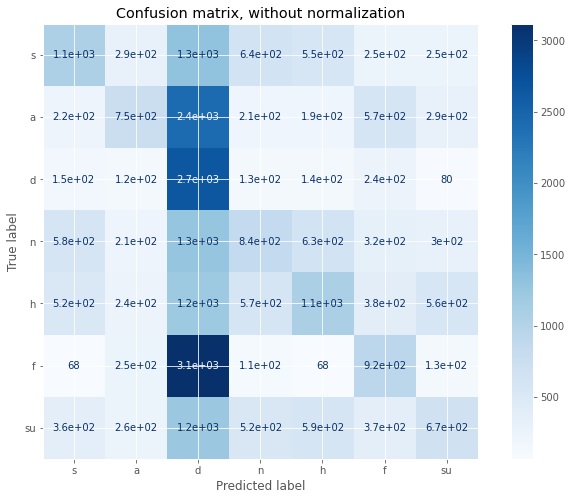

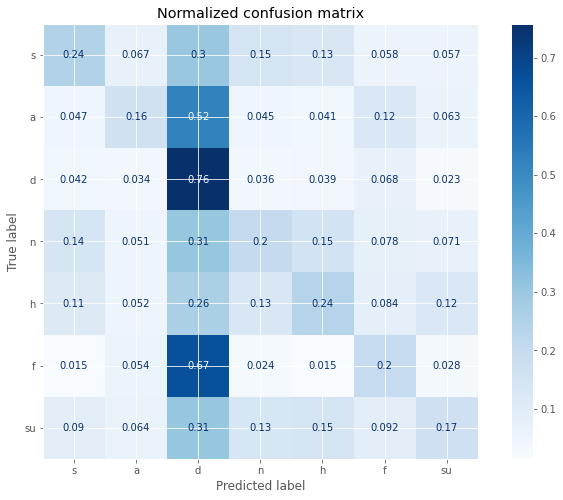

In [17]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

from sklearn.metrics import plot_confusion_matrix
class_names = ['s','a','d','n','h','f','su','sa']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X, y,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()